In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [101]:
df = pd.read_csv("data/housing.csv", header = None, sep = "\s+", names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b1000", "lstat", "medv"])

## **1. EXPLORE DATA TO GAIN INSIGHT**

In [102]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b1000,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10000 USD
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000 USD

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b1000    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [104]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b1000,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [105]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b1000      357
lstat      455
medv       229
dtype: int64

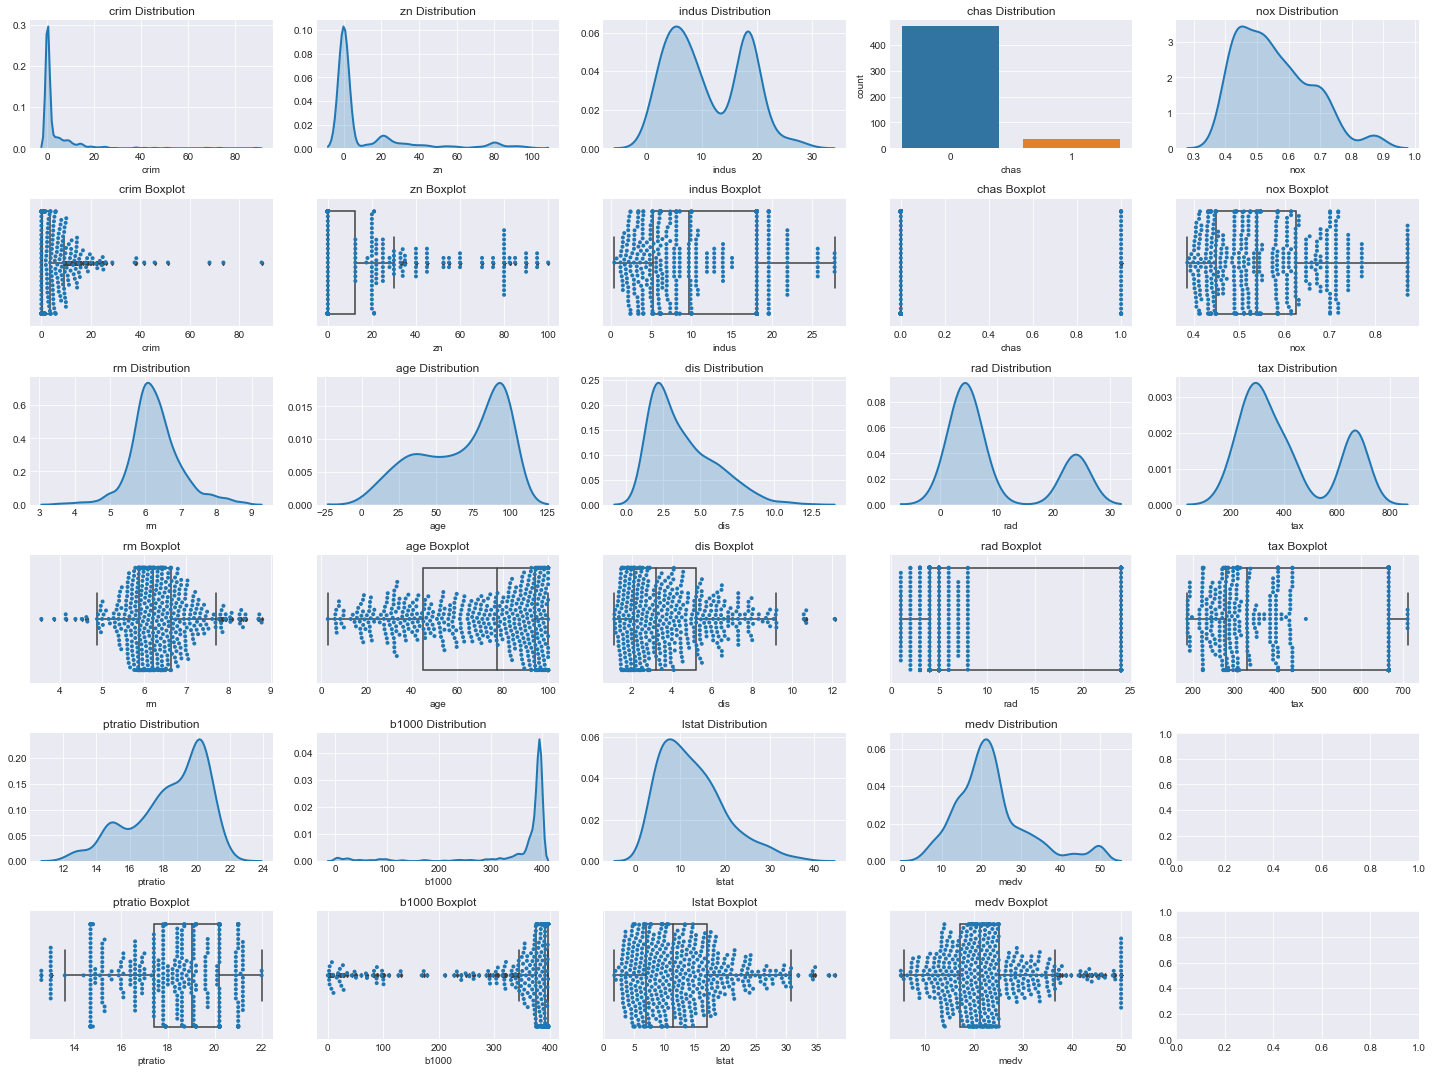

In [106]:
fig, ax = plt.subplots(6, 5, figsize = (20, 15))
columns = df.columns
for row in range(3):
    for col in range(5):
        if (row * 5) + col < 14:
            if columns[(row * 5) + col] == "chas":
                sns.countplot(df[columns[(row * 5) + col]], ax = ax[(row * 2), col])
            else:
                sns.distplot(df[columns[(row * 5) + col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, ax = ax[(row * 2), col])
            sns.boxplot(df[columns[(row * 5) + col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[(row * 2) + 1, col])
            sns.swarmplot(df[columns[(row * 5) + col]], size = 4, ax = ax[(row * 2) + 1, col])
            ax[(row * 2), col].set_title(columns[(row * 5) + col] + " Distribution")
            ax[(row * 2) + 1, col].set_title(columns[(row * 5) + col] + " Boxplot")
plt.tight_layout()
plt.show()

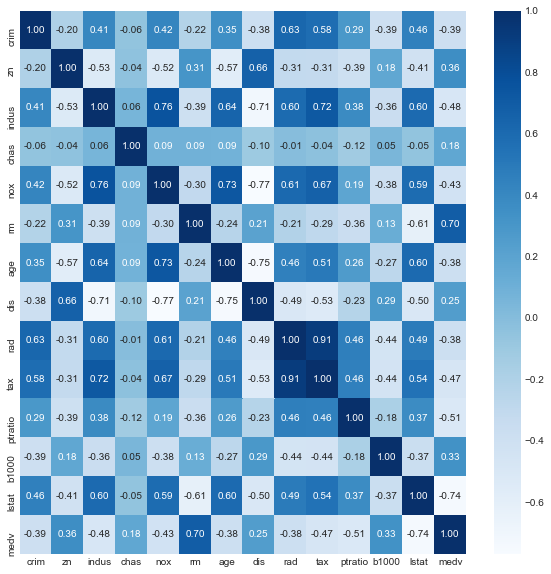

In [107]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

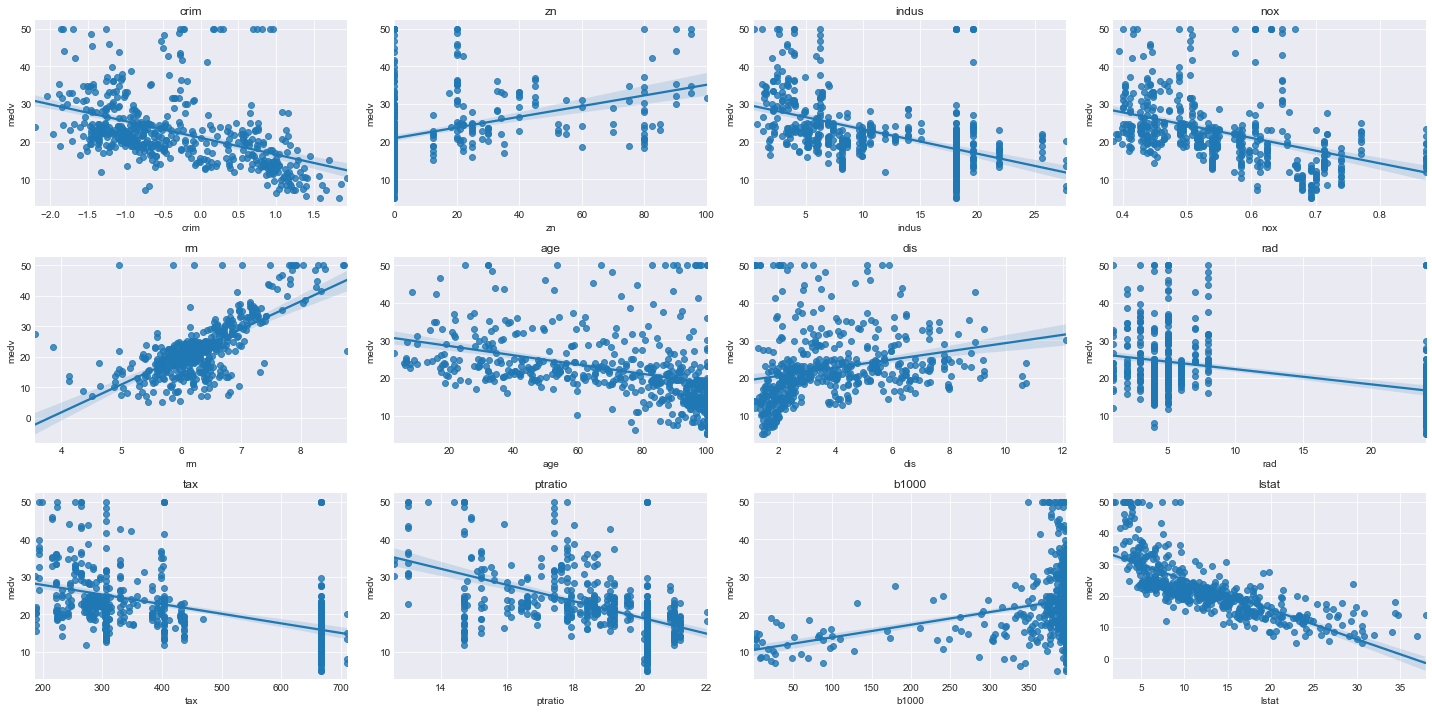

In [108]:
fig, ax = plt.subplots(3, 4, figsize = (20, 10))
columns = list(df.columns)
columns.remove("chas")
columns = columns[:-1]
for row in range(3):
    for col in range(4):
        if df[columns[(row * 4) + col]].skew() > 3:
            sns.regplot(x = np.log10(df[columns[(row * 4) + col]]), y = df["medv"], ax = ax[row, col])
        else:
            sns.regplot(x = columns[(row * 4) + col], y = "medv", data = df, ax = ax[row, col])
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_correlation_boston_price.png')

## **2. PREPARE THE DATA**

### DATA CLEANING

In [10]:
data = df.copy()

In [11]:
columns = data.columns[:-1]
for col in columns:
    if data[col].skew() > 3:
        p25 = np.percentile(np.log10(data[col]), 25)
        p75 = np.percentile(np.log10(data[col]), 75)
    else:
        p25 = np.percentile(data[col], 25)
        p75 = np.percentile(data[col], 75)
    iqr = p75 - p25
    df = data[data[col] <= p75 + 2 * iqr]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


### FEATURE SELECTION

In [12]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(data.drop("medv", axis = 1), data["medv"])

LinearRegression()

In [14]:
coef = pd.DataFrame(lr.coef_, data.drop("medv", axis = 1).columns, columns = ["coef"])
coef = coef.sort_values("coef", ascending = False)

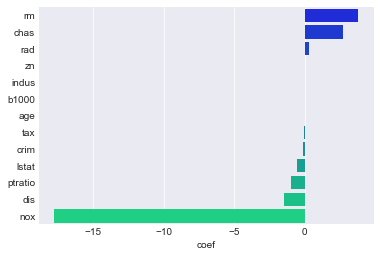

In [15]:
sns.barplot(y = coef.index, x = coef["coef"], palette = "winter")
plt.show()

In [16]:
# vif = pd.DataFrame()
# vif["variables"] = data.drop("medv", axis = 1).columns
# vif["VIF"] = [variance_inflation_factor(data.drop("medv", axis = 1).values, i) for i in range(data.drop("medv", axis = 1).shape[1])]
# vif = vif.sort_values("VIF", ascending = False)
# vif = vif[vif["VIF"] != np.inf]

In [17]:
# variables = list(vif["variables"].unique())
# while vif["VIF"].max() > 10:
#     vif = pd.DataFrame()
#     vif["variables"] = variables
#     vif["VIF"] = [variance_inflation_factor(data[variables].values, i) for i in range(data[variables].shape[1])]
#     vif = vif.sort_values("VIF", ascending = False).reset_index()
#     variables.remove(vif["variables"][0])

In [18]:
# mod = sm.OLS(data["medv"], data[['rad', 'dis', 'lstat', 'crim', 'chas']])
# res = mod.fit()
# print(res.summary())

### FEATURE ENGINEERING

In [19]:
columns = data.columns
for col in columns:
    if data[col].skew() > 3:
        print(col)

crim
chas


In [20]:
data["crim"] = np.log10(data["crim"])

### FEATURE SCALING

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop("medv", axis = 1).values
y = data["medv"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3. EXPLORE MANY DIFFERENT MODELS**

In [25]:
# Algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, BayesianRidge, SGDRegressor, PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Decomposition
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import PolynomialFeatures

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingRegressor

In [26]:
algorithm = {
    'Logistic Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
#     'Lars': Lars(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'SGD Regressor': SGDRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'K Neighbors Classifier': KNeighborsRegressor(),
    'SVR': SVR(),
    'Decision Tree Classifier': DecisionTreeRegressor(),
#     'Gaussian Process Regressor': GaussianProcessRegressor(),
}

In [27]:
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                  scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
    for key, value in score.items():
        if key == "test_r2":
            scores[key] = (round(value.mean(),4))
        else:
            scores[key] = (-1 * round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [29]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })

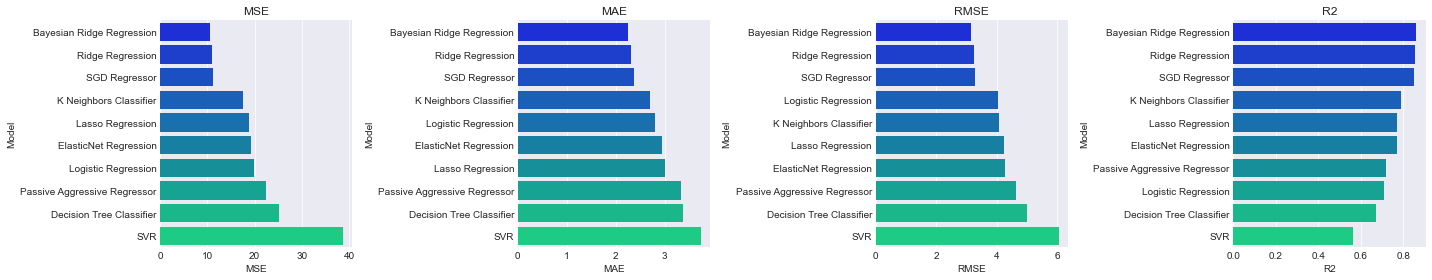

In [30]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'MSE', y = 'Model', data = results.sort_values('MSE', ascending = True), palette = 'winter', ax = ax[0])
sns.barplot(x = 'MAE', y = 'Model', data = results.sort_values('MAE', ascending = True), palette = 'winter', ax = ax[1])
sns.barplot(x = 'RMSE', y = 'Model', data = results.sort_values('RMSE', ascending = True), palette = 'winter', ax = ax[2])
sns.barplot(x = 'R2', y = 'Model', data = results.sort_values('R2', ascending = False), palette = 'winter', ax = ax[3])
ax[0].set_title("MSE")
ax[1].set_title("MAE")
ax[2].set_title("RMSE")
ax[3].set_title("R2")
plt.tight_layout()
plt.show()

In [31]:
results

,Model,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
0,Logistic Regression,19.7515,21.3426,2.8106,1.0654,4.0536,1.8220,0.7100,0.4132
1,Ridge Regression,10.9523,3.9166,2.3183,0.3346,3.2493,0.6282,0.8572,0.0703
2,Lasso Regression,18.7792,7.4209,3.0036,0.2969,4.2565,0.8133,0.7722,0.0788
3,ElasticNet Regression,19.1271,7.7349,2.9358,0.2988,4.2881,0.8601,0.7710,0.0708
4,Bayesian Ridge Regression,10.4641,4.0821,2.2567,0.3381,3.1679,0.6545,0.8625,0.0722
5,SGD Regressor,11.2664,4.3400,2.3787,0.3642,3.2976,0.6265,0.8531,0.0712
6,Passive Aggressive Regressor,22.3211,8.2852,3.3289,0.5888,4.6442,0.8675,0.7208,0.1002
7,K Neighbors Classifier,17.5896,7.3367,2.6948,0.4655,4.0948,0.9070,0.7913,0.0740
8,SVR,38.6977,17.4987,3.7399,0.7398,6.0544,1.4291,0.5614,0.0868
9,Decision Tree Classifier,25.2385,4.0252,3.3754,0.2590,5.0068,0.4131,0.6705,0.1241


### LINEAR REGRESSION

In [32]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [34]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [35]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-19.7515,21.3426,-2.8106,1.0654,-4.0536,1.822,0.71,0.4132


### RIDGE REGRESSION

In [36]:
model = Ridge()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Ridge(), param_grid={'alpha': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [37]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
4,0.001197,0.000399,0.001296,0.000457,5,{'alpha': 5},-10.428644,-11.764827,-11.505664,-14.148351,...,0.738951,0.959016,0.90466,0.754825,0.915419,0.93059,0.889311,0.862143,0.072862,1


In [38]:
model = Ridge(alpha = 5)
model.fit(X_train_poly, y_train)

Ridge(alpha=5)

In [39]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [40]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [41]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-10.4793,4.0843,-2.258,0.3328,-3.1702,0.6553,0.8621,0.0729


### LASSO REGRESSION

In [42]:
model = Lasso()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [43]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.001297,0.000457,0.001496,0.000498,1,{'alpha': 1},-12.970041,-12.445726,-15.813737,-16.014175,...,0.704525,0.808643,0.810058,0.566199,0.764378,0.807545,0.823678,0.77221,0.078788,1


In [44]:
model = Lasso(alpha = 1)
model.fit(X_train_poly, y_train)

Lasso(alpha=1)

In [45]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [46]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [47]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-18.7792,7.4209,-3.0036,0.2969,-4.2565,0.8133,0.7722,0.0788


### ELASTIC NET

In [48]:
model = ElasticNet()
parameters = {"alpha": range(1, 6), "l1_ratio": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': range(1, 6),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [49]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.002189,0.000589,0.001102,0.000306,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-11.228795,-12.809028,-15.394039,...,0.705064,0.820886,0.727682,0.635615,0.794823,0.788922,0.809429,0.773751,0.064902,1


In [50]:
model = ElasticNet(alpha = 1, l1_ratio = 0.1)
model.fit(X_train_poly, y_train)

ElasticNet(alpha=1, l1_ratio=0.1)

In [51]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [52]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [53]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-18.6484,6.5639,-2.9329,0.3335,-4.2516,0.7562,0.7738,0.0649


### BAYESIAN RIDGE

In [54]:
model = BayesianRidge()
parameters = {"alpha_1": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "alpha_2": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "lambda_1": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01], "lambda_2": [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'alpha_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'lambda_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [55]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
210,0.005878,0.001032,0.001396,0.000489,1e-06,0.1,0.1,1e-06,"{'alpha_1': 1e-06, 'alpha_2': 0.1, 'lambda_1':...",-10.300382,...,0.740295,0.959397,0.898199,0.753524,0.915158,0.932748,0.888287,0.862499,0.07217,1


In [56]:
model = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 0.1, lambda_1 = 0.1, lambda_2 = 1e-06)
model.fit(X_train_poly, y_train)

BayesianRidge(alpha_2=0.1, lambda_1=0.1)

In [57]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [58]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [59]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-10.4636,4.0822,-2.2566,0.338,-3.1678,0.6545,0.8625,0.0722


### SGD REGRESSOR

In [60]:
model = SGDRegressor()
parameters = {"l1_ratio": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(),
             param_grid={'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [61]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
2,0.008781,0.001882,0.001386,0.000483,0.3,{'l1_ratio': 0.30000000000000004},-12.700371,-10.009124,-11.903598,-13.608503,...,0.748912,0.928559,0.903023,0.73938,0.902839,0.951963,0.868634,0.857405,0.06776,1


In [62]:
model = SGDRegressor(l1_ratio = 0.6)
model.fit(X_train_poly, y_train)

SGDRegressor(l1_ratio=0.6)

In [63]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [64]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [65]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-11.461,4.0088,-2.4096,0.3442,-3.3356,0.5788,0.8508,0.0667


### PASSIVE AGGRESIVE REGRESSOR

In [66]:
model = PassiveAggressiveRegressor()
parameters = {"C": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveRegressor(),
             param_grid={'C': range(1, 6)}, refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [67]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
1,0.004488,0.000919,0.001696,0.000456,2,{'C': 2},-15.428025,-42.168237,-20.437592,-22.539258,...,0.584132,0.896612,0.830663,0.685489,0.854797,0.923555,0.735729,0.731331,0.197242,2


In [68]:
model = PassiveAggressiveRegressor(C = 2)
model.fit(X_train_poly, y_train)

PassiveAggressiveRegressor(C=2)

In [69]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [70]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [71]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-18.7011,7.3328,-3.0408,0.404,-4.2435,0.833,0.751,0.1369


### KNN

In [72]:
model = KNeighborsRegressor()
parameters = {"n_neighbors": range(1, 6), "leaf_size": [10, 20, 30, 40], "p": range(1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': range(1, 6), 'p': range(1, 6)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [73]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
35,0.008876,0.002113,0.006982,0.001411,20,3,1,"{'leaf_size': 20, 'n_neighbors': 3, 'p': 1}",-9.846233,-4.260542,...,0.629021,0.846628,0.829552,0.654237,0.842235,0.859826,0.85707,0.816784,0.091232,1


In [74]:
model = KNeighborsRegressor(n_neighbors = 3, leaf_size = 20, p = 1)
model.fit(X_train_poly, y_train)

KNeighborsRegressor(leaf_size=20, n_neighbors=3, p=1)

In [75]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [76]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [77]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-14.8561,6.3027,-2.5647,0.431,-3.757,0.8609,0.8168,0.0912


### SVR

In [78]:
model = SVR()
parameters = {"C": range(1, 11), "degree": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': range(1, 11), 'degree': range(1, 11)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [79]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
99,0.039296,0.009539,0.004786,0.001243,10,10,"{'C': 10, 'degree': 10}",-27.210459,-6.470132,-11.500086,...,0.861337,0.877059,0.825068,0.75145,0.875049,0.758988,0.915115,0.829936,0.068911,1


In [80]:
model = SVR(C = 10, degree = 10)
model.fit(X_train_poly, y_train)

SVR(C=10, degree=10)

In [81]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [82]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [83]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-14.8555,8.0767,-2.2778,0.4881,-3.7105,1.0429,0.8299,0.0689


### DECISION TREE

In [84]:
model = DecisionTreeRegressor(criterion = "mse")
parameters = {"max_depth": range(1, 11), "min_samples_split": range(2, 11), "min_samples_leaf": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"], refit = False)
gscv.fit(X_train_poly, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)},
             refit=False,
             scoring=['neg_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_root_mean_squared_error', 'r2'])

In [85]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_neg_mean_squared_error")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
720,0.029901,0.006087,0.002488,0.001432,9,1,2,"{'max_depth': 9, 'min_samples_leaf': 1, 'min_s...",-18.350768,-23.355392,...,0.638155,0.824817,0.737932,0.564884,0.819723,0.889328,0.802069,0.743404,0.10837,5


In [86]:
model = DecisionTreeRegressor(criterion = "mse", max_depth = 8, min_samples_split = 5, min_samples_leaf = 1)
model.fit(X_train_poly, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=5)

In [87]:
scores = {}
score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [88]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [89]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-25.0024,8.686,-3.2446,0.305,-4.9297,0.8367,0.677,0.1506


### FINAL CHECK

In [90]:
algorithm = {
    'Logistic Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha = 5),
    'Lasso Regression': Lasso(alpha = 1),
    'ElasticNet Regression': ElasticNet(alpha = 1, l1_ratio = 0.1),
#     'Lars': Lars(),
    'Bayesian Ridge Regression': BayesianRidge(alpha_1 = 1e-06, alpha_2 = 0.1, lambda_1 = 0.1, lambda_2 = 1e-06),
    'SGD Regressor': SGDRegressor(l1_ratio = 0.6),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(C = 2),
    'K Neighbors Classifier': KNeighborsRegressor(n_neighbors = 3, leaf_size = 20, p = 1),
    'SVR': SVR(C = 10, degree = 10),
    'Decision Tree Classifier': DecisionTreeRegressor(criterion = "mse", max_depth = 8, min_samples_split = 5, min_samples_leaf = 1),
#     'Gaussian Process Regressor': GaussianProcessRegressor(),
}

In [91]:
poly = PolynomialFeatures(2, interaction_only = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [92]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train_poly, y = y_train, cv = 10,
                  scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
    for key, value in score.items():
        if key == "test_r2":
            scores[key] = (round(value.mean(),4))
        else:
            scores[key] = (-1 * round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [93]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })

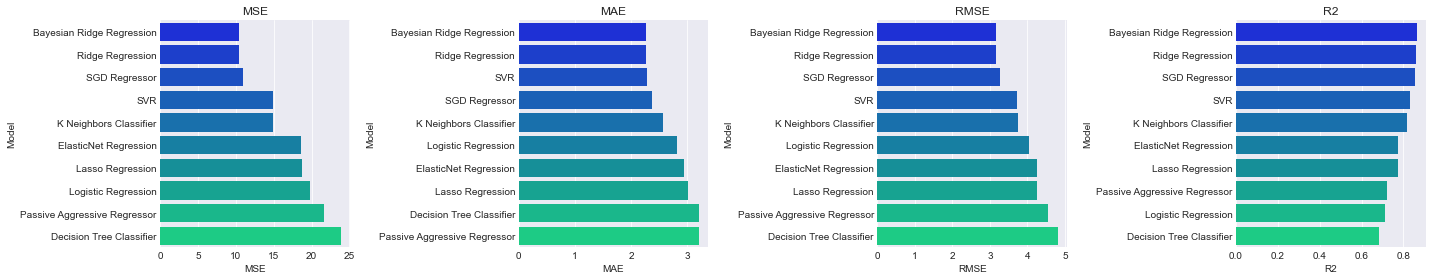

In [94]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'MSE', y = 'Model', data = results.sort_values('MSE', ascending = True), palette = 'winter', ax = ax[0])
sns.barplot(x = 'MAE', y = 'Model', data = results.sort_values('MAE', ascending = True), palette = 'winter', ax = ax[1])
sns.barplot(x = 'RMSE', y = 'Model', data = results.sort_values('RMSE', ascending = True), palette = 'winter', ax = ax[2])
sns.barplot(x = 'R2', y = 'Model', data = results.sort_values('R2', ascending = False), palette = 'winter', ax = ax[3])
ax[0].set_title("MSE")
ax[1].set_title("MAE")
ax[2].set_title("RMSE")
ax[3].set_title("R2")
plt.tight_layout()
plt.show()

In [95]:
results

,Model,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
0,Logistic Regression,19.7515,21.3426,2.8106,1.0654,4.0536,1.8220,0.7100,0.4132
1,Ridge Regression,10.4793,4.0843,2.2580,0.3328,3.1702,0.6553,0.8621,0.0729
2,Lasso Regression,18.7792,7.4209,3.0036,0.2969,4.2565,0.8133,0.7722,0.0788
3,ElasticNet Regression,18.6484,6.5639,2.9329,0.3335,4.2516,0.7562,0.7738,0.0649
4,Bayesian Ridge Regression,10.4636,4.0822,2.2566,0.3380,3.1678,0.6545,0.8625,0.0722
5,SGD Regressor,11.0041,4.2095,2.3726,0.3823,3.2590,0.6191,0.8559,0.0690
6,Passive Aggressive Regressor,21.6206,9.0313,3.2107,0.6606,4.5469,0.9727,0.7230,0.1246
7,K Neighbors Classifier,14.8561,6.3027,2.5647,0.4310,3.7570,0.8609,0.8168,0.0912
8,SVR,14.8555,8.0767,2.2778,0.4881,3.7105,1.0429,0.8299,0.0689
9,Decision Tree Classifier,23.8307,8.2685,3.2032,0.3063,4.8121,0.8210,0.6810,0.1570


### ENSEMBLE

In [96]:
# clf1 = LinearRegression()
clf2 = Ridge(alpha = 5)
# clf3 = Lasso(alpha = 1)
# clf4 = ElasticNet(alpha = 1, l1_ratio = 0.1)
clf5 = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 0.1, lambda_1 = 0.1, lambda_2 = 1e-06)
clf6 = SGDRegressor(l1_ratio = 0.6)
# clf7 = PassiveAggressiveRegressor(C = 2)
clf8 = KNeighborsRegressor(n_neighbors = 3, leaf_size = 20, p = 1)
clf9 = SVR(C = 10, degree = 10)
# clf10 = DecisionTreeRegressor(criterion = "mse", max_depth = 8, min_samples_split = 5, min_samples_leaf = 1)

eclf = VotingRegressor(estimators=[("rr", clf2), ("br", clf5), ("sgd", clf6), ("knn", clf8), ("svr", clf9)])
eclf = eclf.fit(X_train_poly, y_train)

In [97]:
scores = {}
score = cross_validate(estimator = eclf, X = X_train_poly, y = y_train, cv = 10,
                       scoring = ["neg_mean_squared_error", "neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"])
for key, value in score.items():
    scores[key] = (round(value.mean(),4))
    scores[key + 'std'] = (round(value.std(),4))

In [98]:
results = pd.DataFrame(scores.values(), index = scores.keys(), columns = ["score"])
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_neg_mean_squared_error': 'MSE',
                                  'test_neg_mean_absolute_error': 'MAE',
                                  'test_neg_root_mean_squared_error': 'RMSE',
                                  'test_r2': 'R2',
                                  'score_timestd': 'Score Time Std',
                                  'test_neg_mean_squared_errorstd': 'MSE Std',
                                  'test_neg_mean_absolute_errorstd': 'MAE Std',
                                  'test_neg_root_mean_squared_errorstd': 'RMSE Std',
                                  'test_r2std': 'R2 Std',
                                 })
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 0, inplace = True)
results = results.T

In [99]:
results

,MSE,MSE Std,MAE,MAE Std,RMSE,RMSE Std,R2,R2 Std
score,-9.4404,3.9685,-2.0541,0.2617,-3.0097,0.6182,0.8806,0.0591
